In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score,cohen_kappa_score
import pandas as pd
from scipy import stats



In [12]:
df = pd.read_csv('/home/abdelrahman.sadallah/mbzuai/review_rewrite/data/Batch_4_classification/Boda.csv')
df2 = pd.read_csv('/home/abdelrahman.sadallah/mbzuai/review_rewrite/data/Batch_4_classification/Tim.csv')
df3 = pd.read_csv('/home/abdelrahman.sadallah/mbzuai/review_rewrite/data/Batch_4_classification/chatgpt.csv')
# df3 = None

In [13]:
column1 = ['actionability', 'grounding_specificity', 'verifiability','helpfulness']


In [14]:
df['actionability']

0        2: Vague-Implicit
1     5: Concrete-Explicit
2     5: Concrete-Explicit
3        1: Not-Actionable
4     5: Concrete-Explicit
              ...         
85                     NaN
86                     NaN
87                     NaN
88                     NaN
89                     NaN
Name: actionability, Length: 90, dtype: object

In [15]:
### measure correlation between actionability and grounding_specificity
df[column1] = df[column1].applymap(lambda x: x[0] if pd.notnull(x) else x)
df = df.dropna(subset=column1)

## set the type of the columns to int
df[column1] = df[column1].astype(int)

## replace valyes of 2,4 to 1, an 3,5 to 2
df['grounding_specificity'] = df['grounding_specificity'].replace({2:1, 4:1, 3:2, 5:2})
df['actionability'] = df['actionability'].replace({2:1, 3:1, 4:2, 5:2})


print('number of rows:', df.shape[0])

correlation = stats.spearmanr(df['actionability'], df['grounding_specificity'])

print('correlation between actionability and grounding_specificity:', correlation)


## keep only rows with value of 4,5 for actionability and  3,5 for grounding_specificity
df = df[(df['actionability'] == 4) | (df['actionability'] == 5)]
df = df[(df['grounding_specificity'] == 3) | (df['grounding_specificity'] == 5)]

print('number of rows:', df.shape[0])
correlation = stats.spearmanr(df['actionability'], df['grounding_specificity'])

print('correlation between actionability and grounding_specificity considering only `concerete` and `specific` examples:', correlation)

number of rows: 54
correlation between actionability and grounding_specificity: SignificanceResult(statistic=0.3636659331206832, pvalue=0.006869744908667353)
number of rows: 0
correlation between actionability and grounding_specificity considering only `concerete` and `specific` examples: SignificanceResult(statistic=nan, pvalue=nan)


/tmp/ipykernel_3334956/3027204649.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[column1] = df[column1].applymap(lambda x: x[0] if pd.notnull(x) else x)


In [5]:
num_rows_with_values = len(df.dropna(subset=column1))
print(num_rows_with_values)
num_rows_with_values = len(df2.dropna(subset=column1))
print(num_rows_with_values)
num_rows_with_values = len(df3.dropna(subset=column1))
print(num_rows_with_values)

54
51
55


In [6]:
df[column1] = df[column1].applymap(lambda x: x[0] if pd.notnull(x) else x)
df2[column1] = df2[column1].applymap(lambda x: x[0] if pd.notnull(x) else x)
# df3[column1] = df3[column1].applymap(lambda x: str(int(x))[0] if pd.notnull(x) else x)

/tmp/ipykernel_3587196/694119066.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[column1] = df[column1].applymap(lambda x: x[0] if pd.notnull(x) else x)
/tmp/ipykernel_3587196/694119066.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2[column1] = df2[column1].applymap(lambda x: x[0] if pd.notnull(x) else x)


In [7]:
df2['grounding_specificity'].replace('G', '6', inplace=True)

/tmp/ipykernel_3587196/2285527308.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['grounding_specificity'].replace('G', '6', inplace=True)


In [8]:
df2['grounding_specificity'].value_counts()

grounding_specificity
6    14
3    11
5     9
4     9
2     5
1     3
Name: count, dtype: int64

In [9]:
# df['human_verifiability'] = df['human_verifiability'].replace('NO_CLAIM','0')
# df2['human_verifiability'] = df2['human_verifiability'].replace('NO_CLAIM','0')



In [10]:
# ########3 Merge 0 labels with 1
# for col in column1:
#     df[col] = df[col].replace(0, 1).replace('0', 1)
#     df2[col] = df2[col].replace(0, 1).replace('0', 1)
#     df3[col] = df3[col].replace(0, 1).replace('0', 1)

In [11]:
annotator_1 = 'Tim'
annotator_2 = 'Boda'

dfs = {'Tim': df2, 'Boda': df, 'ChatGPT': df3}

In [12]:
columns_to_plot = column1

# Create a dictionary to store the data for each aspect
aspect_data_filtered = {aspect: {annotator_1: [], annotator_2: []} for aspect in columns_to_plot}

# Iterate over each aspect
for aspect in columns_to_plot:

    ## make a mini  combined dataframe with the aspect column from each annotator
    mini_df = pd.concat([dfs[annotator_1][aspect], dfs[annotator_2][aspect]], axis=1).dropna()
    mini_df.columns = [annotator_1, annotator_2]

    print(len(mini_df))

    # ####### consider only examples when the two human annotators agree
    # all_df = pd.concat([dfs['Boda'][aspect], dfs['Tim'][aspect], dfs['ChatGPT'][aspect]], axis=1).dropna()
    # all_df.columns = ['Boda', 'Tim', 'ChatGPT']
    # print(len(all_df))

    # #########################################################333


    ## iterate over rows in all three dataframes
    for i in range(len(mini_df)):
        
        x = mini_df.iloc[i][annotator_1]
        y = mini_df.iloc[i][annotator_2]
        ## Map NO_CLAIM to 0
        if x == 'NO_CLAIM':
            x = '0'
        if y == 'NO_CLAIM':
            y = '0'

        x = str(int(x))
        y = str(int(y))
        
    
        possible_values = ['1', '2', '3', '4', '5']
        if aspect == 'verifiability':
            possible_values = ['1', '2', '3', '4']
        

        # ############################# consider only examples when the two human annotators agree
        # xx = str(int(all_df.iloc[i]['Boda']))
        # yy = str(int(all_df.iloc[i]['Tim']))
        # zz = str(int(all_df.iloc[i]['ChatGPT']))
        # if xx in possible_values and yy in possible_values and zz in possible_values and abs(int(xx) - int(yy)) <= 1:
        #     aspect_data_filtered[aspect][annotator_1].append(yy)
        #     aspect_data_filtered[aspect][annotator_2].append(zz)
        # ############################################################3

        if x in possible_values and y in possible_values:
            aspect_data_filtered[aspect][annotator_1].append(x)
            aspect_data_filtered[aspect][annotator_2].append(y)
    

51
51
51
51


In [13]:


for aspect in columns_to_plot:
    annotator1_data = aspect_data_filtered[aspect][annotator_1]
    annotator2_data = aspect_data_filtered[aspect][annotator_2]

    # ################# Remove the samples where the annotators disagreement on human_actionability is more than 1 #################
    # ignore_idecies = []
    # if aspect != 'human_actionability':
    #     for i in range(len(aspect_data_filtered['human_actionability'][annotator_1])):
    #         val_1 = aspect_data_filtered['human_actionability'][annotator_1][i]
    #         val_2 = aspect_data_filtered['human_actionability'][annotator_2][i]
    #         if abs(int(val_1) - int(val_2)) > 1:
    #             ignore_idecies.append(i)     
    # assert len(annotator1_data) == len(annotator2_data)
    # annotator1_data = [i for j, i in enumerate(annotator1_data) if j not in ignore_idecies]
    # annotator2_data = [i for j, i in enumerate(annotator2_data) if j not in ignore_idecies]
    # assert len(annotator1_data) == len(annotator2_data)
    # ############################################################################################################




    print(f'Agreement Statistics for {aspect}')
    print(f' Total number of samples: {len(annotator1_data)}')
    print(f' F1 Score: {f1_score(annotator1_data,annotator2_data, average="micro"):.2f}')
    print(f' Kappa Score: {cohen_kappa_score(annotator1_data, annotator2_data):.2f}')
    print(f' Linear Kappa Score: {cohen_kappa_score(annotator1_data, annotator2_data, weights="linear"):.2f}')
    print(f' Quadratic Kappa Score: {cohen_kappa_score(annotator1_data, annotator2_data, weights="quadratic"):.2f}')

    res = stats.spearmanr(annotator1_data, annotator2_data)
    print(f' Spearman Correlation: {res.correlation:.2f}')

    print('-' * 50)

print('=' * 50)

Agreement Statistics for actionability
 Total number of samples: 51
 F1 Score: 0.27
 Kappa Score: 0.10
 Linear Kappa Score: 0.35
 Quadratic Kappa Score: 0.54
 Spearman Correlation: 0.58
--------------------------------------------------
Agreement Statistics for grounding_specificity
 Total number of samples: 37
 F1 Score: 0.54
 Kappa Score: 0.40
 Linear Kappa Score: 0.53
 Quadratic Kappa Score: 0.65
 Spearman Correlation: 0.70
--------------------------------------------------
Agreement Statistics for verifiability
 Total number of samples: 31
 F1 Score: 0.58
 Kappa Score: 0.42
 Linear Kappa Score: 0.52
 Quadratic Kappa Score: 0.60
 Spearman Correlation: 0.62
--------------------------------------------------
Agreement Statistics for helpfulness
 Total number of samples: 51
 F1 Score: 0.35
 Kappa Score: 0.16
 Linear Kappa Score: 0.37
 Quadratic Kappa Score: 0.57
 Spearman Correlation: 0.57
--------------------------------------------------


In [14]:
df['actionability'].value_counts( )

actionability
5    15
1    15
4    14
2     5
3     5
Name: count, dtype: int64

In [15]:
df2['actionability'].value_counts( )

actionability
2    13
4    12
3    10
1    10
5     6
Name: count, dtype: int64

actionability
--------------------------------------------------
grounding_specificity
--------------------------------------------------
verifiability
--------------------------------------------------
helpfulness
--------------------------------------------------


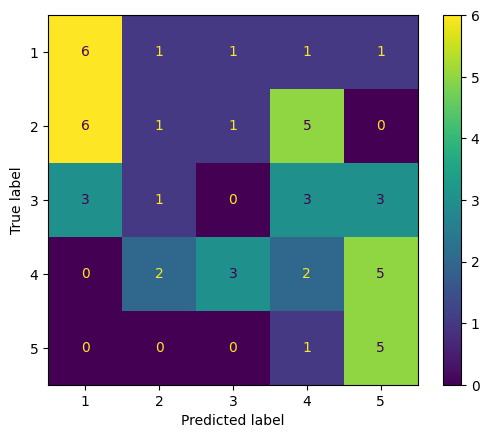

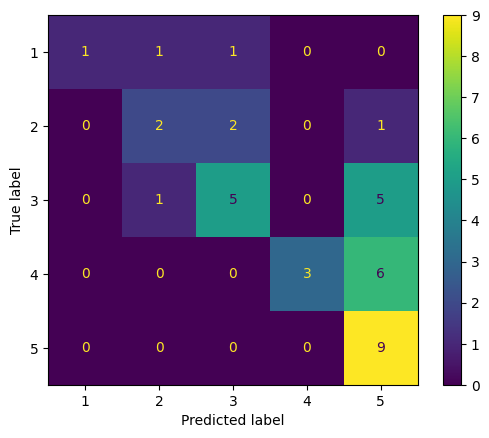

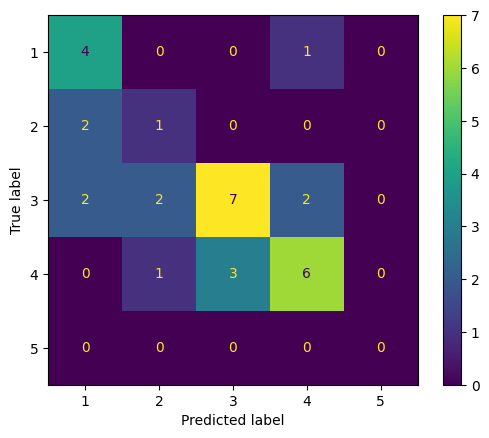

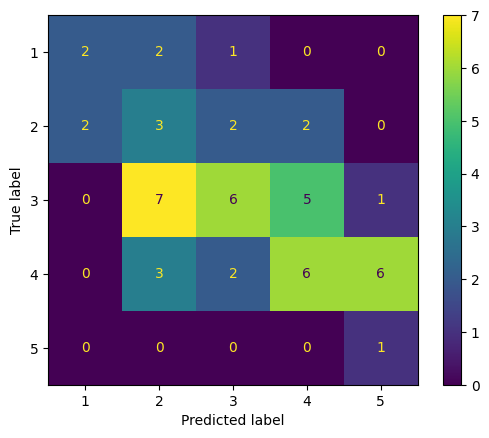

In [16]:
## draw confusion matrix

for aspect in columns_to_plot:
    annotator1_data = aspect_data_filtered[aspect][annotator_1]
    annotator2_data = aspect_data_filtered[aspect][annotator_2]

    if aspect == 'human_verifiability':
        possible_values = ['0','1', '2', '3', '4', '5']
    else:
        possible_values = ['1', '2', '3', '4', '5']
    
    print(aspect)
    cm = confusion_matrix(annotator1_data, annotator2_data, labels=possible_values)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=possible_values)
    disp.plot()
    # print(cm)
    print('-' * 50)


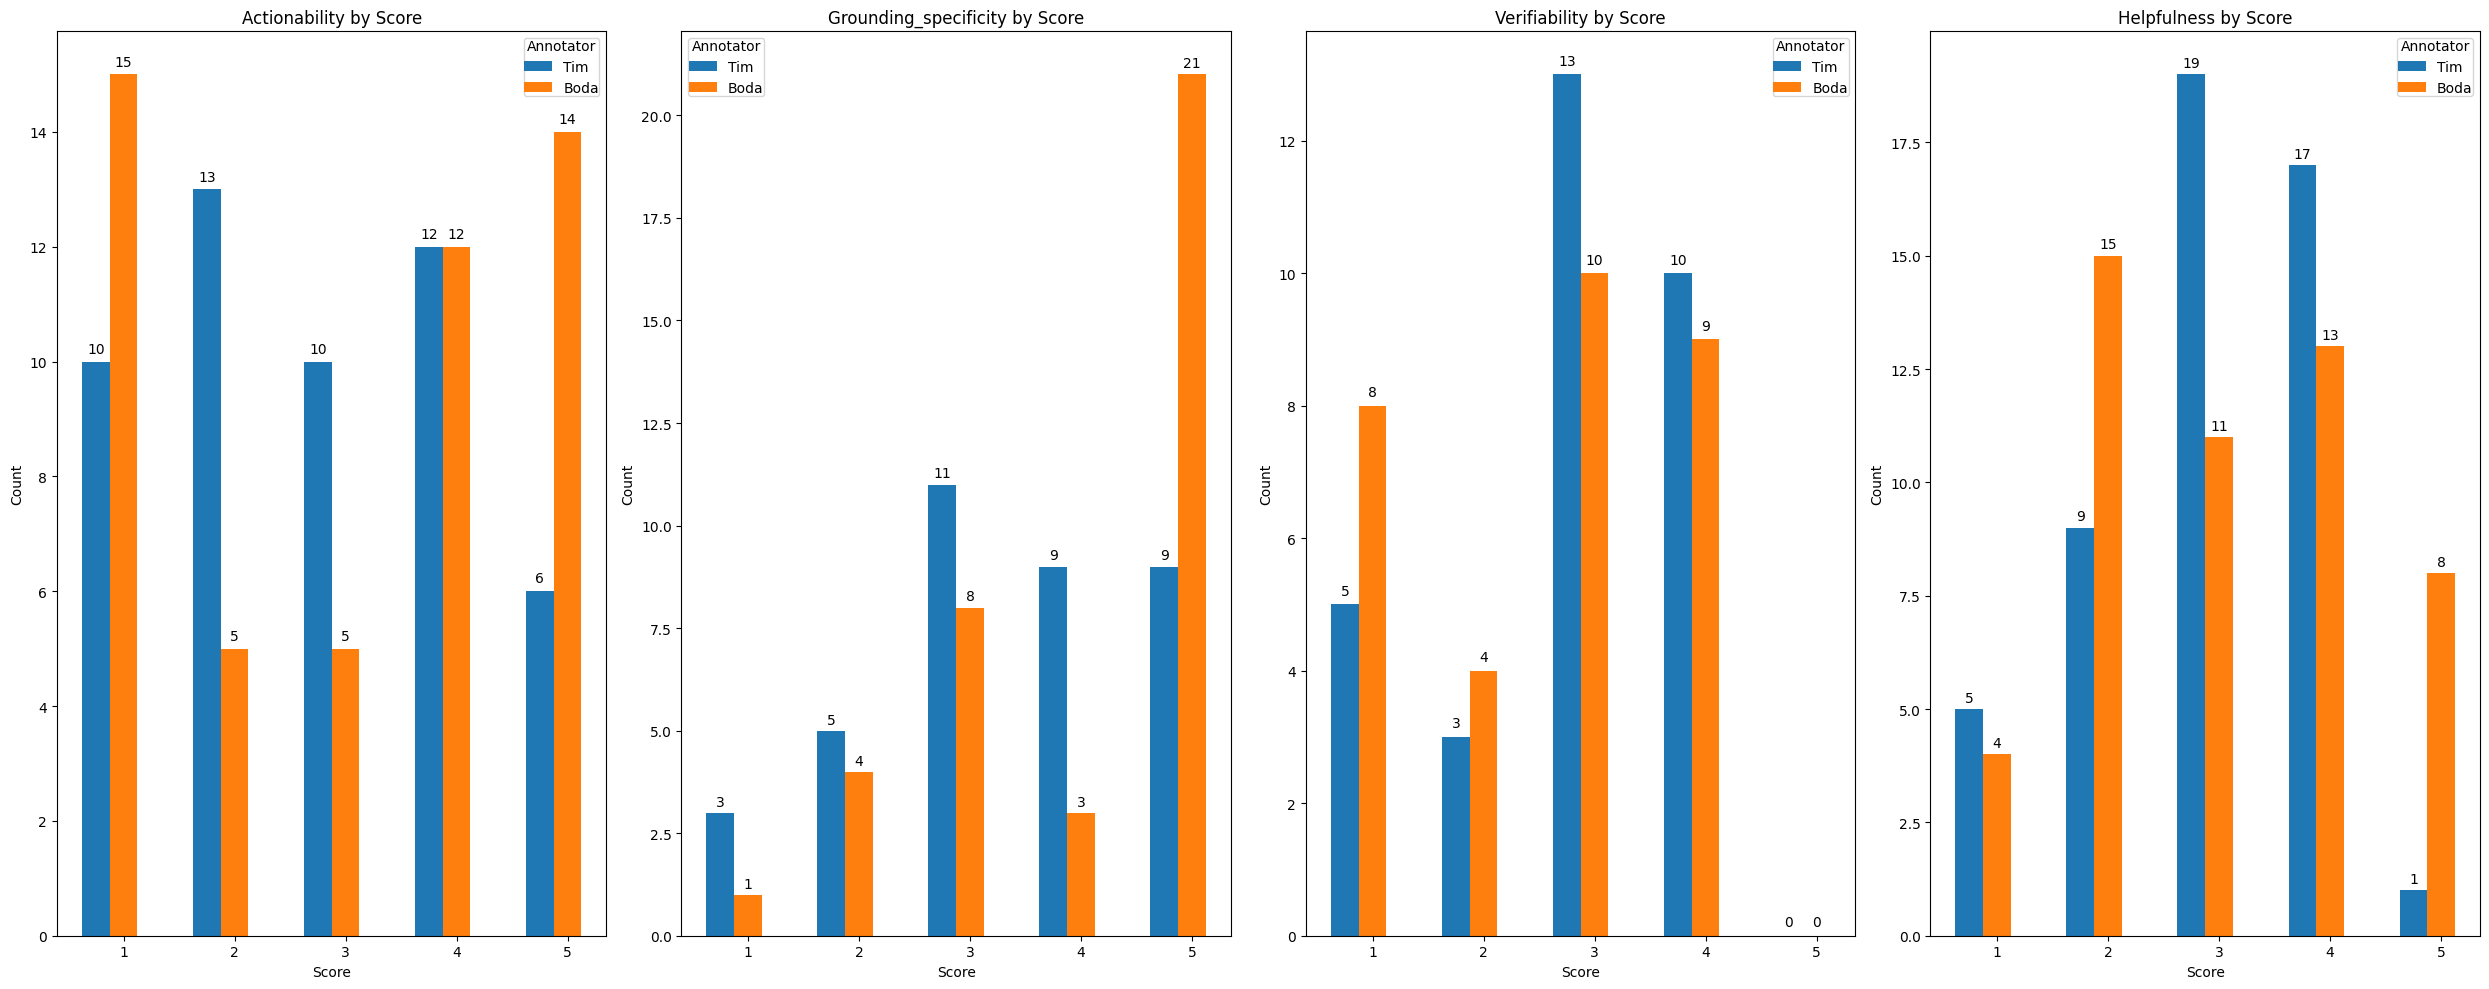

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Redefine data to fit the updated chart structure
# Data is now organized by scores for each aspect

columns_to_plot = column1
annotators = [annotator_1, annotator_2]
# Create chart with separated scores for each aspect
fig, axes = plt.subplots(1, 4, figsize=(25, 10))

# Define score categories for consistent plotting
# scores = [-1, 0, 1]

for idx, aspect in enumerate(columns_to_plot):
    scores = [ 0, 1, 2, 3, 4, 5] if aspect == 'human_verifiability' else [ 1, 2, 3, 4,5]
    x = np.arange(len(scores))  # Score categories
    ax = axes[idx]
    # Offset position for each annotator
    bar_width = 0.25
    for i, annotator in enumerate(annotators):
        counts = [aspect_data_filtered[aspect][annotator].count(str(score)) for score in scores]
        
        # Plot bars for each annotator
        bars = ax.bar(x + i * bar_width, counts, width=bar_width, label=annotator)
        
        # Annotate each bar with the count value
        for bar in bars:
            yval = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                yval + 0.1,  # Adjust this value for placement above bars
                int(yval), 
                ha='center', 
                va='bottom'
            )

    ax.set_title(f'{aspect.capitalize()} by Score')
    ax.set_xlabel('Score')
    ax.set_ylabel('Count')
    ax.set_xticks(x + bar_width)
    ax.set_xticklabels(scores)
    ax.legend(title='Annotator', borderpad=0.05)

plt.tight_layout()
plt.show()
